In [1]:
%matplotlib inline

fmalliaros@lix.polytechnique.fr

In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
nx.__version__

'1.10'

# Part 1

In [4]:
path = "ca-GrQc.txt"
G = nx.read_edgelist( path , comments= '#'  , delimiter=None , create_using=None ,
                     nodetype=None , data=True , edgetype=None , encoding= 'utf-8' )

In [6]:
print G.number_of_nodes()
print G.number_of_edges()
# print G.nodes()
# print G.edges()


5242
14496


In [9]:
print nx.is_connected(G)
print nx.number_connected_components(G)

False
355


In [31]:
comps = list(nx.connected_component_subgraphs(G))
comps_nodes = [len(c.nodes()) for c in comps]
# comps_nodes

In [34]:
# Gc = max(nx.connected_component_subgraphs(G), key=len)
GCC = list(comps)[np.argmax(comps_nodes)]
print GCC.number_of_nodes()
print GCC.number_of_edges()
print float(GCC.number_of_nodes())/G.number_of_nodes()
print float(GCC.number_of_edges())/G.number_of_edges()

4158
13428
0.79320869897
0.926324503311


In [36]:
degree_sequence = G.degree().values()
len(degree_sequence)

5242

In [47]:
print np.mean(degree_sequence)
print np.median(degree_sequence)
print np.min(degree_sequence)
print np.max(degree_sequence)

5.53071346814
3.0
1
81


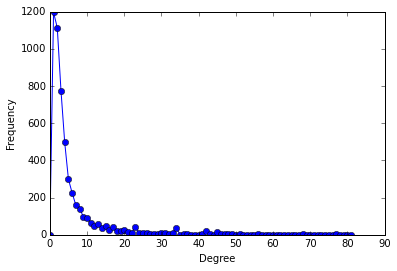

In [46]:
y=nx.degree_histogram(G)
plt.plot(y,"b-",marker='o')
plt.ylabel("Frequency" )
plt.xlabel('Degree')
# plt.show()


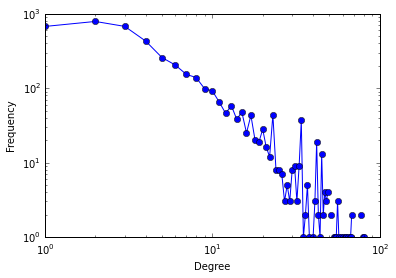

In [52]:
y=nx.degree_histogram(GCC)
plt.loglog(y,"b-",marker='o')
plt.ylabel("Frequency" )
plt.xlabel('Degree')
# Power-law distribution (heavy tailed)

In [ ]:
t = nx.triangles(GCC)
print GCC.number_of_edges()
print np.sum(t.values())/3
delta = np.sum(t.values())/3
# the graph is dense (more triangles than edges)

In [76]:
A =nx.adjacency_matrix(G)
n = GCC.number_of_nodes()

In [ ]:
import scipy as sc
eigvals, _ = sc.sparse.linalg.eigs(A.astype('float'),k=n-1000)

In [ ]:
for i in range(eigvals)